In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#dataset 
from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [6]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
#Independent data
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
data.data.shape

(20640, 8)

In [9]:
df['Target']= data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Exploratory Data Analysis

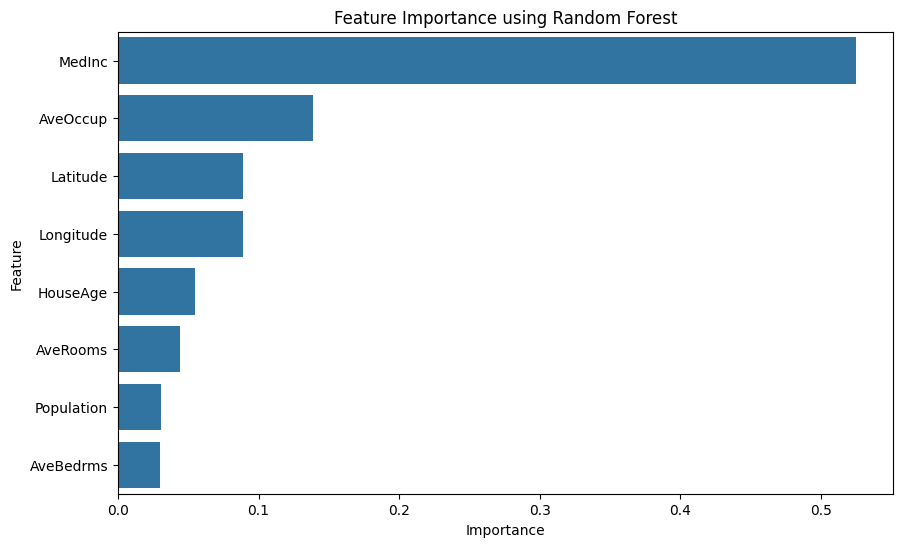

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns


# Splitting data into features (X) and target (y)
rf_X = df.drop(columns=['Target'])  
rf_y = df['Target']  

# Splitting the data into training and testing sets
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(rf_X_train, rf_y_train)
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to view the feature importances
importance_df = pd.DataFrame({
    'Feature': rf_X.columns,
    'Importance': feature_importances
})

# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance using Random Forest')
plt.show()

# Data Preprocessing

In [11]:
#Feature engineering- using the features latitude and longitude to create a new feature location 
#using the geopy library to convert the latitude and longitude into actual addresses from the web

import pickle

loc_update = pickle.load(open("../data/ca_housing_complete.pkl","rb"))

In [12]:
loc = pd.DataFrame(loc_update)
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  20640 non-null  object
 1   Road    20640 non-null  object
dtypes: object(2)
memory usage: 322.6+ KB


In [13]:
loc.replace("Unknown", None, inplace=True)

In [14]:
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  20033 non-null  object
 1   Road    19616 non-null  object
dtypes: object(2)
memory usage: 322.6+ KB


In [15]:
#Add new features to the dataset
for i in loc.keys():
    df[i]=loc[i]

df = df.sample(axis=0,frac=1)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,County,Road
11428,5.7117,16.0,5.774882,1.037915,986.0,2.336493,33.69,-117.98,2.472,Orange County,Santa Isadora Street
11767,4.0500,33.0,5.556401,0.986058,1775.0,2.249683,38.74,-121.28,1.347,Placer County,Hillcrest Avenue
20584,3.3472,19.0,5.802752,1.045872,755.0,3.463303,38.65,-121.95,0.698,Yolo County,County Road 25
617,4.9135,52.0,7.188811,0.902098,317.0,2.216783,37.73,-122.15,2.750,Alameda County,Pala Avenue
17339,5.0380,13.0,5.958763,0.907216,1084.0,2.793814,34.87,-120.44,1.940,Santa Barbara County,Stansbury Drive


In [16]:
# Drop Latitude and Longitude
df2 = df.drop(labels=["Latitude", "Longitude", ],axis=1)
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,County,Road
11428,5.7117,16.0,5.774882,1.037915,986.0,2.336493,2.472,Orange County,Santa Isadora Street
11767,4.0500,33.0,5.556401,0.986058,1775.0,2.249683,1.347,Placer County,Hillcrest Avenue
20584,3.3472,19.0,5.802752,1.045872,755.0,3.463303,0.698,Yolo County,County Road 25
617,4.9135,52.0,7.188811,0.902098,317.0,2.216783,2.750,Alameda County,Pala Avenue
17339,5.0380,13.0,5.958763,0.907216,1084.0,2.793814,1.940,Santa Barbara County,Stansbury Drive


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 11428 to 5844
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Target      20640 non-null  float64
 7   County      20033 non-null  object 
 8   Road        19616 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


## Using Classification Algorithm to fill in the missing values

## Predicting Road values

In [15]:
#applying Logictic regression to find the missing road values
missing_idx =[]

for i in range(df2.shape[0]):
    if df2['Road'][i] is None:
        missing_idx.append(i)

#Independent Parameters
missing_Road_X_train = np.array([ [df2['MedInc'][i],df2['AveRooms'][i],df2['AveBedrms'][i]] for i in range(df2.shape[0]) if i not in missing_idx])

#Dependant Parameters
missing_Road_y_train = np.array( [df2['Road'][i] for i in range(df2.shape[0]) if i not in missing_idx])

missing_Road_X_test = np.array([ [df2['MedInc'][i],df2['AveRooms'][i],df2['AveBedrms'][i]] for i in range(df2.shape[0]) if i  in missing_idx])

missing_Road_X_train = missing_Road_X_train.reshape(-1, 3)  
missing_Road_y_train = missing_Road_y_train.ravel() 
missing_Road_X_test = missing_Road_X_test.reshape(-1, 3) 

In [16]:
from sklearn.linear_model import SGDClassifier

#initialize the model
model_1 = SGDClassifier()

#Model training 
model_1.fit(missing_Road_X_train,missing_Road_y_train)

missing_Road_y_pred = model_1.predict(missing_Road_X_test)

In [17]:
for n,i in enumerate(missing_idx):
    df2.loc[i, 'Road'] = missing_Road_y_pred[n]

#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['Road']= le.fit_transform(df2['Road'])

df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,County,Road
12998,6.1943,13.0,6.532468,0.909091,267.0,3.467532,2.761,Sacramento County,8162
3865,4.3333,33.0,4.711246,1.044073,1388.0,2.109422,2.613,Los Angeles County,276
20127,4.4219,34.0,5.850220,1.074890,795.0,3.502203,3.381,Ventura County,4056
16844,4.9732,34.0,5.572776,0.925876,2154.0,2.902965,3.423,San Mateo County,938
18207,3.4028,27.0,3.706207,1.059310,1362.0,1.878621,3.242,Santa Clara County,4978


### Predicting County Values

In [18]:
#applying Logictic regression to find the missing County values
missing_idx =[]

for i in range(df2.shape[0]):
    if df2['County'][i] is None:
        missing_idx.append(i)

#Independent Parameters
missing_County_X_train = np.array([ [df2['MedInc'][i],df2['AveRooms'][i],df2['AveBedrms'][i]] for i in range(df2.shape[0]) if i not in missing_idx])

#Dependant Parameters
missing_County_y_train = np.array( [df2['County'][i] for i in range(df2.shape[0]) if i not in missing_idx])

missing_County_X_test = np.array([ [df2['MedInc'][i],df2['AveRooms'][i],df2['AveBedrms'][i]] for i in range(df2.shape[0]) if i  in missing_idx])

missing_County_X_train = missing_County_X_train.reshape(-1, 3)  
missing_County_y_train = missing_County_y_train.ravel() 
missing_County_X_test = missing_County_X_test.reshape(-1, 3) 

In [19]:
from sklearn.linear_model import SGDClassifier

#initialize the model
model_1 = SGDClassifier()

#Model training 
model_1.fit(missing_County_X_train,missing_County_y_train)

missing_County_y_pred = model_1.predict(missing_County_X_test)

In [20]:
for n,i in enumerate(missing_idx):
    df2.loc[i, 'County'] = missing_County_y_pred[n]

#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['County']= le.fit_transform(df2['County'])

df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,County,Road
12998,6.1943,13.0,6.532468,0.909091,267.0,3.467532,2.761,35,8162
3865,4.3333,33.0,4.711246,1.044073,1388.0,2.109422,2.613,19,276
20127,4.4219,34.0,5.850220,1.074890,795.0,3.502203,3.381,56,4056
16844,4.9732,34.0,5.572776,0.925876,2154.0,2.902965,3.423,41,938
18207,3.4028,27.0,3.706207,1.059310,1362.0,1.878621,3.242,43,4978


In [ ]:
import pandas as pd

csv_file_path = "./data/encoded_data.csv"

# Save the DataFrame to a CSV file
df2.to_csv(csv_file_path, index=False)

print(f"Encoded data has been saved to {csv_file_path}")


Encoded data has been saved to ./data/encoded_data.csv
